Pick N representative samples from an 1-D array based on their value

# Start

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_gaps(a_unique: np.array) -> bool:
    '''heuristic to avoid empty bins'''
    bin_width = (a_unique.max() - a_unique.min()) / (n - 1)
    gap_detected = False
    dist = 0
    for i in range(len(a_unique)-1):
        prev_dist = dist
        dist = a_unique[i+1] - a_unique[i]
        if dist + prev_dist > 2 * bin_width:
            gap_detected = True
    return gap_detected

In [15]:
def prepare_array(arr: np.array, n: int):
    a_unique = np.unique(arr)
    if len(a_unique) < n:
        err_msg = f'N={n} is higher than the number of unique values.'
        raise ValueError(err_msg)
    return a_unique

In [3]:
def prepare_bins(a_unique: np.array, n: int) -> tuple:
    a_linspace = np.linspace(
        a_unique.min(),
        a_unique.max(),
        n * 2 - 1
    )
    bin_borders = a_linspace[1::2]
    bin_centers = a_linspace[::2]
    bins = {}
    for i in range(len(bin_borders)-1):
        bins[i] = {
            'left': bin_borders[i],
            'right': bin_borders[i+1],
            'center': bin_centers[i],
            'values': []
        }
    return bins, bin_borders, bin_centers

In [4]:
def split_into_bins(bins: dict, a_unique: np.array) -> dict:    
    n_bins = len(bins)
    current_bin = 0
    for val in a_unique[1: -1]:
        val_is_in_bin = False
        while not val_is_in_bin:
            val_is_in_bin = bins[current_bin]['left'] <= val
            val_is_in_bin &= bins[current_bin]['right'] > val
            if not val_is_in_bin:
                current_bin += 1
            if current_bin >= n_bins:
                break
        if current_bin >= n_bins:
            break
        else:
            bins[current_bin]['values'].append(val)
    return bins

In [5]:
def plot(a_unique: np.array, bin_borders: np.array, bin_centers: np.array):
    plt.figure(figsize=(10, 1))
    #unique values
    plt.scatter(
        x=a_unique,
        y=np.ones_like(a_unique),
        c='gray'
    )
    #bin borders
    plt.scatter(
        x=bin_borders,
        y=np.ones_like(bin_borders),
        marker='|',
        s=2000,
        c='orange'
    )
    # bin centers
    plt.scatter(
        x=bin_centers,
        y=np.ones_like(bin_centers),
        marker='x',
        s=20,
        c='red'
    )
    plt.yticks([])
    plt.show()
    return None

# Work

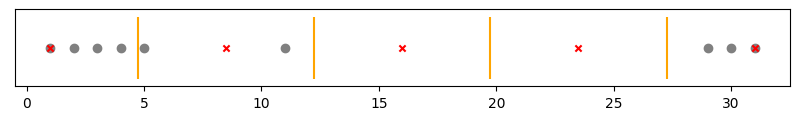

In [22]:
N = 5
a = np.array([1, 2, 3, 3, 3, 4, 5, 11, 29, 30, 30, 31])
# a = np.array([1, 2, 3, 3, 3, 4, 5, 11])


a_unique = prepare_array(a, N)
bins, bin_borders, bin_centers = prepare_bins(a_unique, N)
plot(a_unique, bin_borders, bin_centers)

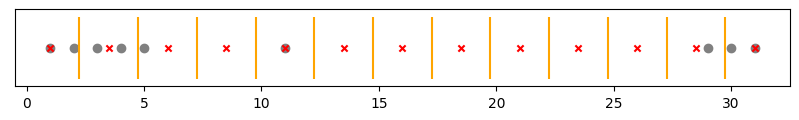

In [23]:
okay = False
n = N
count = 0
while not okay:
    count += 1
    bins, bin_borders, bin_centers = prepare_bins(a_unique, n)
    # plot(a_unique, bin_borders, bin_centers)
    bins = split_into_bins(bins, a_unique)
    nonempty_bins = np.sum([1 for bin in bins.values() if bin['values']])
    if nonempty_bins < N - 2:
        n += 1
    else:
        okay = True
    if count == len(a_unique):
        break
plot(a_unique, bin_borders, bin_centers)

In [ ]:
nonempty_bins

In [ ]:
bins

In [ ]:
okay = False
while not okay:
    n += 1
    a_linspace = np.linspace(a.min(), a.max(), n * 2 - 1)
    bin_borders = a_linspace[1::2]
    bin_centers = a_linspace[::2]
    gap_detected = detect_gaps(a_unique)


plt.figure(figsize=(10, 1))
#unique values
plt.scatter(
    x=a_unique,
    y=np.ones_like(a_unique),
    c='gray'
)
#bin borders
plt.scatter(
    x=bin_borders,
    y=np.ones_like(bin_borders),
    marker='|',
    s=2000,
    c='orange'
)
# bin centers
plt.scatter(
    x=bin_centers,
    y=np.ones_like(bin_centers),
    marker='x',
    s=20,
    c='red'
)
plt.yticks([])
plt.show()

split into bins

check for empty bins

In [ ]:
split_into_bins(a, N)